In [2]:
from src.base_test import FDTD2D
from src.utilis import *
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Parameters
params = {
    'nx': 200,
    'ny': 200,
    'time_steps': 100,
    'dx':25e-9,
    'dy': 25e-9,
    'dt':  25/6e8,
    'pml_thickness': 20,
    'polarization': 'TM',
    #'tfsf_thickness': 10,
    'order': 1,
    'r_err': 1e-6,
    'use_pml' : True,
    'source_type': 'plane_wave'  
}

### Testing initializations

In [9]:
params['polarization'] = 'TM'

tm_sim = FDTD2D(params)
print(f"\nTM Polarization:")
print(f"Hx grid shape: {tm_sim.Hx.shape}")
print(f"Hy grid shape: {tm_sim.Hy.shape}")
print(f"Ez grid shape: {tm_sim.Ez.shape}")


TM Polarization:
Hx grid shape: torch.Size([200, 200])
Hy grid shape: torch.Size([200, 200])
Ez grid shape: torch.Size([200, 200])


### Testing define geometry

In [4]:
tm_sim.gaz, tm_sim.gbz = circle_primitive(100,100,25,25,10,30,8.854e-12,0.3,tm_sim.gaz,tm_sim.gbz,tm_sim.dt)

c:\Users\mazzo\anaconda3\envs\fdtd\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


### Show material distribution

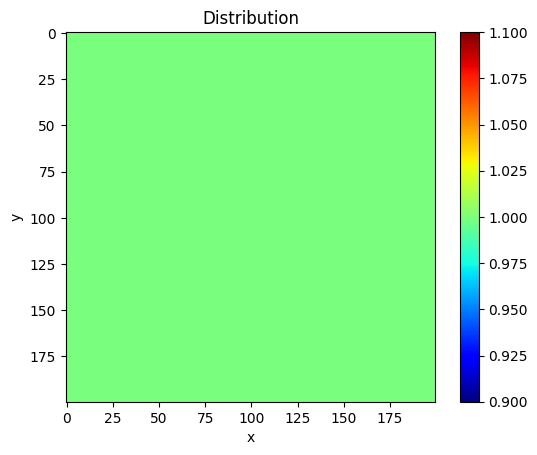

In [4]:
# Visualize permittivity distribution
plt.imshow(tm_sim.gaz, cmap='jet')
plt.title('Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(cmap='jet')
plt.show()

### Test simulation

In [10]:
for i in range(1, tm_sim.time_steps):
    tm_sim.simulation_step(i)

In [11]:
def plot_e_field_imshow(ax, data): 
    """Contour Plot of E field at a single time step""" 
    plt.imshow(data, cmap='jet') 
    #CP.collections[4].remove() 
    # above removes extraneous outer contour display 
    ax.set_xticks(np.arange(0,tm_sim.nx, step=20)) 
    ax.set_yticks(np.arange(0,tm_sim.ny, step=20))
    plt.colorbar(cmap='jet')
    plt.xlabel('cm') 
    plt.ylabel('cm')

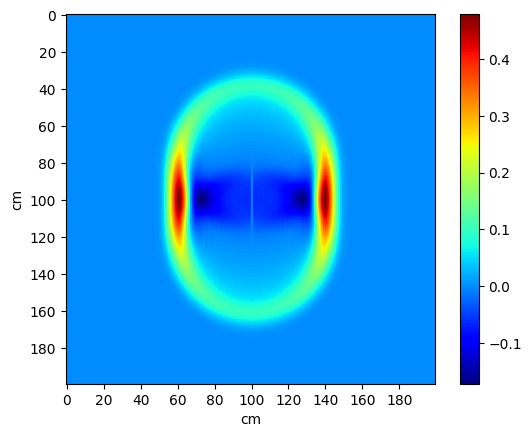

In [12]:
X, Y = np.meshgrid(range(tm_sim.nx), range(tm_sim.ny))
fig, ax = plt.subplots()
plot_e_field_imshow(ax, tm_sim.Dz)


In [13]:
def plot_e_field(ax, data, timestep, label):
    """
    3D Plot of E field at a single time step
    """
    #ax.set_zlim(0, 1)
    #ax.view_init(elev=20., azim=45)
    ax.plot_surface(X, Y, data[:, :], rstride=1, cstride=1,
                    color='white', edgecolor='black', linewidth=.25)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r'$E_{Z}$', rotation=90, labelpad=10, fontsize=14)
    ax.set_zticks([0, 0.5, 1])
    ax.set_xlabel('cm')
    ax.set_ylabel('cm')
    ax.set_xticks(np.arange(0, tm_sim.nx, step=20))
    ax.set_yticks(np.arange(0, tm_sim.ny, step=20))
    ax.text2D(0.6, 0.7, "T = {}".format(timestep), transform=ax.transAxes)
    plt.gca().patch.set_facecolor('white')
    ax.text2D(-0.2, 0.8, "({})".format(label), transform=ax.transAxes)
    ax.dist = 11


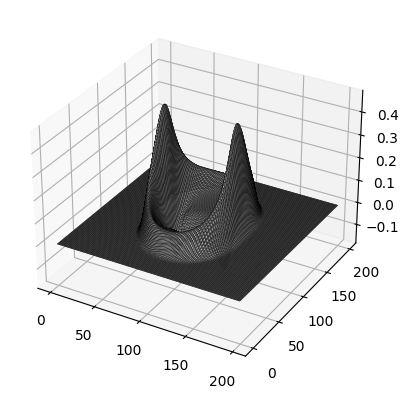

In [14]:
X, Y = np.meshgrid(range(tm_sim.nx), range(tm_sim.ny))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, tm_sim.Ez[:, :], rstride=1, cstride=1,
                    color='white', edgecolor='black', linewidth=.25)